# freud.locality.PeriodicBuffer: Unit Cell RDF
The `PeriodicBuffer` class is meant to replicate points beyond a single image while respecting box periodicity. This example demonstrates how we can use this to compute the radial distribution function from a sample crystal's unit cell.

In [1]:
%matplotlib inline
import freud
import matplotlib.pyplot as plt
import numpy as np

Here, we create a box to represent the unit cell and put two points inside. We plot the box and points below.

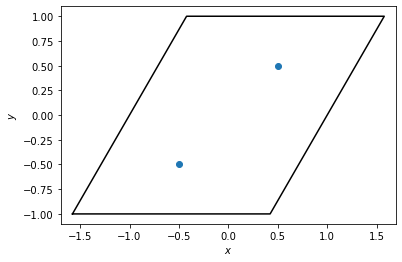

In [2]:
box = freud.box.Box(Lx=2, Ly=2, xy=np.sqrt(1 / 3), is2D=True)
points = np.array([[-0.5, -0.5, 0], [0.5, 0.5, 0]])
system = freud.AABBQuery(box, points)
system.plot(ax=plt.gca())
plt.show()

Next, we create a `PeriodicBuffer` instance and have it compute the "buffer" points that lie outside the first periodicity. These positions are stored in the `buffer_points` attribute. The corresponding `buffer_ids` array gives a mapping from the index of the buffer particle to the index of the particle it was replicated from, in the original array of `points`. Finally, the `buffer_box` attribute returns a larger box, expanded from the original box to contain the replicated points.

In [3]:
pbuff = freud.locality.PeriodicBuffer()
pbuff.compute(system=(box, points), buffer=6, images=True)
print(pbuff.buffer_points[:10], "...")

[[ 0.65470022  1.5         0.        ]
 [ 1.80940032  3.5         0.        ]
 [ 2.96410179  5.5         0.        ]
 [-3.96410131 -6.5         0.        ]
 [-2.80940104 -4.49999952  0.        ]
 [-1.65470016 -2.50000048  0.        ]
 [ 1.50000024 -0.5         0.        ]
 [ 2.65470076  1.5         0.        ]
 [ 3.80940032  3.5         0.        ]
 [ 4.96410179  5.5         0.        ]] ...


Below, we plot the original unit cell and the replicated buffer points and buffer box.

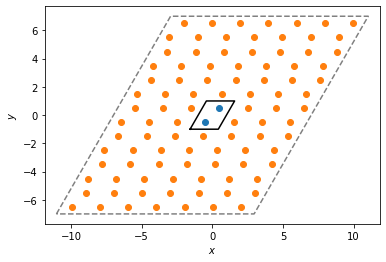

In [4]:
system.plot(ax=plt.gca())
plt.scatter(pbuff.buffer_points[:, 0], pbuff.buffer_points[:, 1])
pbuff.buffer_box.plot(ax=plt.gca(), linestyle="dashed", color="gray")
plt.show()

Finally, we can plot the radial distribution function (RDF) of this replicated system, using a value of `r_max` that is larger than the size of the original box. This allows us to see the interaction of the original points with their replicated neighbors from the buffer.

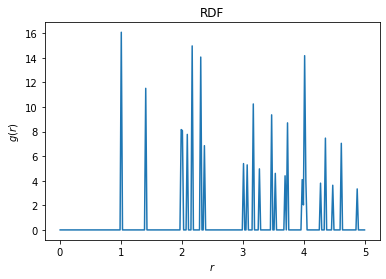

In [5]:
rdf = freud.density.RDF(bins=250, r_max=5)
rdf.compute(system=(pbuff.buffer_box, pbuff.buffer_points), query_points=points)
rdf.plot(ax=plt.gca())
plt.show()